In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Population Growth and Economic Growth in an OLG Model

We analyze three different population growth scenarios:
1. Increasing population ( $g_L > 0$)
2. Constant population ($g_L = 0$)
3. Decreasing population ($g_L < 0$)

The economy follows a **Cobb-Douglas production function**:

$$
Y_t = A K_t^\alpha L_t^{1-\alpha}
$$

where:
- \( $Y_t$ \) is GDP (output),
- \( $A$ \) is Total Factor Productivity (TFP),
- \( $K_t$ \) is capital,
- \( $L_t$ \) is labor (workforce),
- \( $\alpha$ \) is the capital share of output.

Capital accumulates based on savings and depreciation:

$$
K_{t+1} = s Y_t + (1-\delta) K_t
$$

where:
- \( $s$ \) is the savings rate,
- \( $\delta$ \) is the depreciation rate.


In [2]:
T = 50  # Number of periods
alpha = 0.33  # Capital share
s = 0.2  # Savings rate
delta = 0.05  # Depreciation rate
A_const = 1  # Fixed Total Factor Productivity (No TFP Growth)

L0 = 100  # Initial workforce
K0 = 50   # Initial capital

g_L_values = [0.01, 0, -0.01]  # Increasing, Constant, Decreasing


## Simulation Process

We simulate GDP and population growth for **50 periods** under three different population growth rates.

For each period \($t$\), we:
1. Compute the new population: 
   $$
   L_t = L_{t-1} (1 + g_L)$$
   
2. Compute GDP using the Cobb-Douglas production function:
   $$Y_t = A K_t^\alpha L_t^{1-\alpha}$$

3. Update capital using the accumulation equation:
   $$K_{t+1} = s Y_t + (1-\delta) K_t$$



In [43]:
GDP_results_no_tech = {}
Labor_results_no_tech = {}
GDP_growth_no_tech = {}  

for g_L in g_L_values:
    L = np.zeros(T)
    K = np.zeros(T)
    Y = np.zeros(T)
    growth_rates_no_tech = np.zeros(T - 1) 

    L[0] = L0
    K[0] = K0

    for t in range(1, T):
        L[t] = L[t-1] * (1 + g_L)

        Y[t-1] = A_const * (K[t-1] ** alpha) * (L[t-1] ** (1 - alpha))

        K[t] = s * Y[t-1] + (1 - delta) * K[t-1]

        if t > 1:
            growth_rates_no_tech[t - 2] = (Y[t-1] - Y[t-2]) / Y[t-2] * 100  

    Y[T-1] = A_const * (K[T-1] ** alpha) * (L[T-1] ** (1 - alpha))

    GDP_results_no_tech[g_L] = Y.copy()
    Labor_results_no_tech[g_L] = L.copy()
    GDP_growth_no_tech[g_L] = growth_rates_no_tech.copy()

In [63]:
df_no_tech = pd.DataFrame(GDP_growth_no_tech)
df_no_tech.index = [f"Year {i+1}" for i in range(T-1)]
df_no_tech.columns = [f"g_L = {g_L:.2%}" for g_L in g_L_values]
print("Growth in %")
print("-----------------------------------------------")
print(df_no_tech.head().round(2))
print(df_no_tech.tail().round(2))
print("----------------- Mean Growth -----------------")
print(df_no_tech.mean().round(2))

Growth in %
-----------------------------------------------
        g_L = 1.00%  g_L = 0.00%  g_L = -1.00%
Year 1         8.88         8.16          7.43
Year 2         7.59         6.82          6.05
Year 3         6.63         5.83          5.03
Year 4         5.88         5.07          4.25
Year 5         5.29         4.46          3.63
         g_L = 1.00%  g_L = 0.00%  g_L = -1.00%
Year 45         1.32         0.39         -0.53
Year 46         1.30         0.37         -0.54
Year 47         1.29         0.36         -0.56
Year 48         1.27         0.34         -0.58
Year 49         0.00         0.00          0.00
----------------- Mean Growth -----------------
g_L = 1.00%     2.57
g_L = 0.00%     1.71
g_L = -1.00%    0.85
dtype: float64


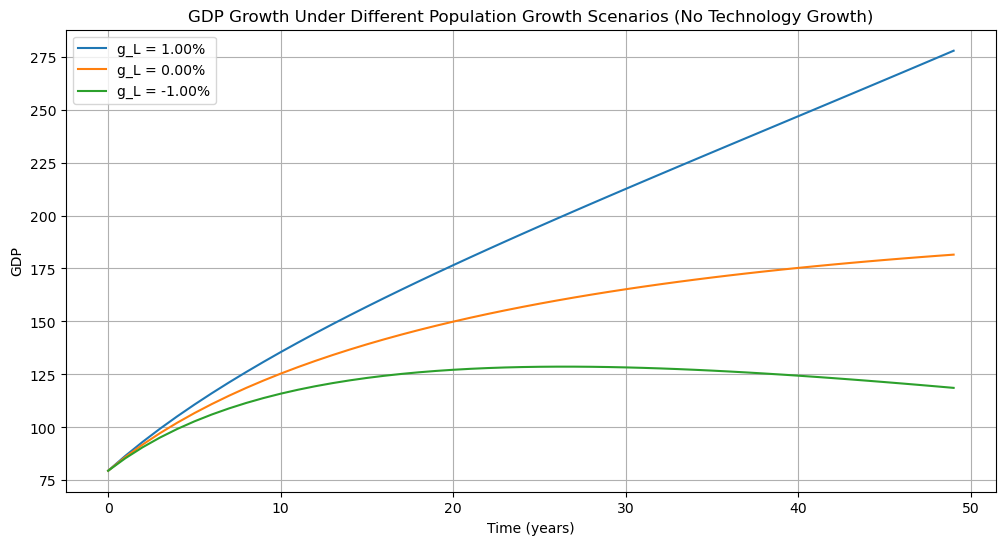

In [5]:
plt.figure(figsize=(12, 6))
for g_L in g_L_values:
    plt.plot(GDP_results_no_tech[g_L], label=f"g_L = {g_L:.2%}")
plt.xlabel("Time (years)")
plt.ylabel("GDP")
plt.title("GDP Growth Under Different Population Growth Scenarios (No Technology Growth)")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation

### Key Observations:
1. **GDP depends on the labor force**: 
   - When population grows, GDP grows.
   - When population declines, GDP shrinks.
2. **Economic growth is affected by labor supply**: 
   - A shrinking workforce leads to lower production and economic output.
   - A growing workforce contributes to higher economic growth.

### Next Step:
- Introduce technological progress ($A_t$) to see if **technology can offset population decline**.

--------------------------------------------------------------------------------------------

In our previous simulation, GDP was solely driven by **population growth** and **capital accumulation**. However, in reality, **technological progress** plays a crucial role in economic growth.

### **Why Introduce Technology ($A_t$)?**
- Many advanced economies (e.g., Denmark) grow despite declining populations because **technology increases productivity**.
- **Higher innovation and automation allow fewer workers to produce more output.**
- By introducing **technological progress ($A_t$)**, we can test whether technology can compensate for a shrinking workforce.

### **New Assumptions**
- **Technology follows exponential growth:**  
  $$
  A_t = A_0 (1 + g_A)^t
  $$
  where $g_A$ is the technology growth rate.
- The **updated Cobb-Douglas function** now includes $A_t$ (not constant anymore):
  $$
  Y_t = A_t K_t^\alpha L_t^{1-\alpha}
  $$


In [8]:
g_A = 0.02  # 2% annual growth in technology
A0 = 1  # Initial technology level (normalized)


In [26]:
GDP_results_with_tech = {}
GDP_growth_with_tech = {} 

for g_L in g_L_values:
    L = np.zeros(T)
    K = np.zeros(T)
    A = np.zeros(T)
    Y = np.zeros(T)
    growth_rates = np.zeros(T - 1)  #

    L[0] = L0
    K[0] = K0
    A[0] = A0  

    for t in range(1, T):
        L[t] = L[t-1] * (1 + g_L)

        A[t] = A[t-1] * (1 + g_A)  

        Y[t-1] = A[t-1] * (K[t-1] ** alpha) * (L[t-1] ** (1 - alpha))

        K[t] = s * Y[t-1] + (1 - delta) * K[t-1]

        if t > 1:
            growth_rates[t - 2] = (Y[t-1] - Y[t-2]) / Y[t-2] * 100  

    Y[T-1] = A[T-1] * (K[T-1] ** alpha) * (L[T-1] ** (1 - alpha))

    GDP_results_with_tech[g_L] = Y.copy()
    GDP_growth_with_tech[g_L] = growth_rates.copy()

In [64]:
df_with_tech = pd.DataFrame(GDP_growth_with_tech)
df_with_tech.index = [f"Year {i+1}" for i in range(T-1)]
df_with_tech.columns = [f"g_L = {g_L:.2%}" for g_L in g_L_values]

print("Growth in %")
print("-----------------------------------------------")
print(df_with_tech.head().round(2))
print(df_with_tech.tail().round(2))
print("----------------- Mean Growth -----------------")
print(df_with_tech.mean().round(2))


Growth in %
-----------------------------------------------
        g_L = 1.00%  g_L = 0.00%  g_L = -1.00%
Year 1        11.06        10.32          9.58
Year 2         9.90         9.12          8.33
Year 3         9.03         8.21          7.40
Year 4         8.34         7.51          6.67
Year 5         7.80         6.94          6.09
         g_L = 1.00%  g_L = 0.00%  g_L = -1.00%
Year 45         4.19         3.21          2.23
Year 46         4.18         3.19          2.21
Year 47         4.17         3.18          2.20
Year 48         4.17         3.17          2.19
Year 49         0.00         0.00          0.00
----------------- Mean Growth -----------------
g_L = 1.00%     5.24
g_L = 0.00%     4.33
g_L = -1.00%    3.42
dtype: float64


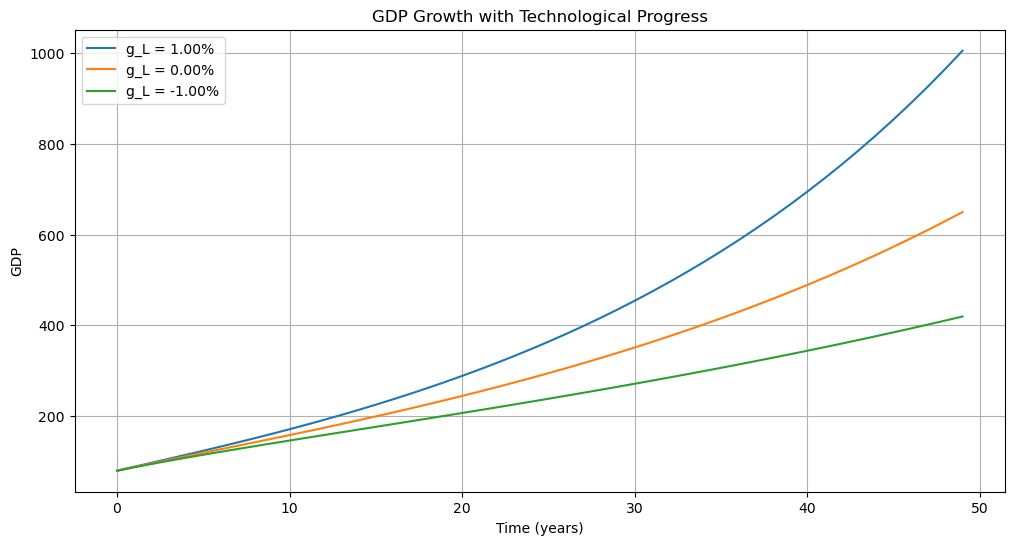

In [11]:
plt.figure(figsize=(12, 6))
for g_L in g_L_values:
    plt.plot(GDP_results_with_tech[g_L], label=f"g_L = {g_L:.2%}")
plt.xlabel("Time (years)")
plt.ylabel("GDP")
plt.title("GDP Growth with Technological Progress")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
Tech_results = {}

for g_L in g_L_values:
    A = np.zeros(T) 
    A[0] = A0 

    for t in range(1, T):
        A[t] = A[t-1] * (1 + g_A)

        Y[t-1] = A[t-1] * (K[t-1] ** alpha) * (L[t-1] ** (1 - alpha))

    Y[T-1] = A[T-1] * (K[T-1] ** alpha) * (L[T-1] ** (1 - alpha))

    Tech_results[g_L] = A.copy()


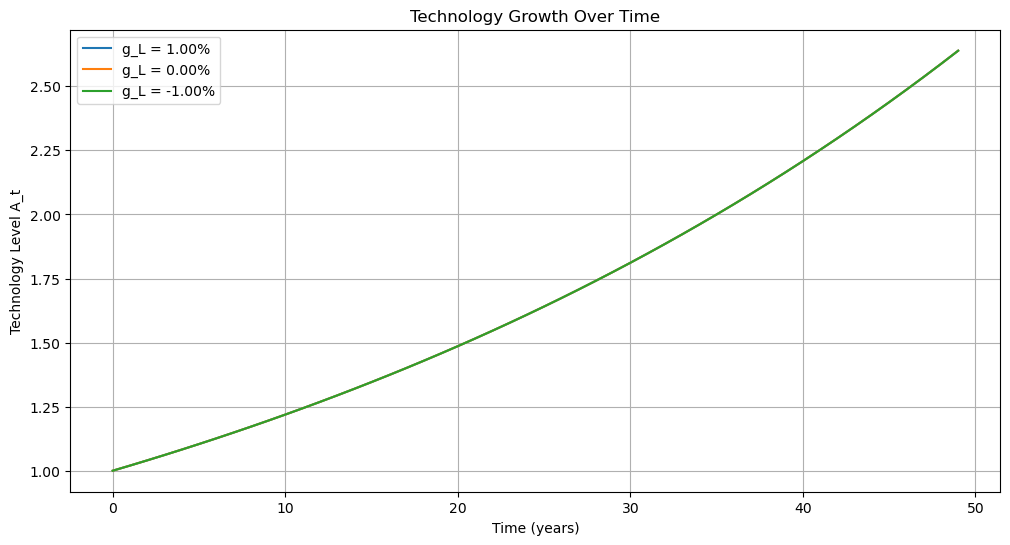

In [13]:
plt.figure(figsize=(12, 6))
for g_L in g_L_values:
    plt.plot(Tech_results[g_L], label=f"g_L = {g_L:.2%}")
plt.xlabel("Time (years)")
plt.ylabel("Technology Level A_t")
plt.title("Technology Growth Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Key Takeaways:
**Technology offsets population decline** → Even with fewer workers, GDP can continue growing.  
**A higher $g_A$ leads to faster growth** → Innovation is essential for long-term prosperity.  

## Next Steps:
- Introduce an **OLG model** with young, workers, and retired.
- Analyze the role of **education and skill improvements** in boosting productivity.

-----------------------

# **Infinite-Horizon OLG Model with Bequests**

## **1️. Model Setup**
This model follows an **infinite-period OLG structure**, meaning that **new generations continuously enter the economy**, and agents make decisions considering the long-term effects of their choices.

Each individual **lives for three periods**:
1. **Young ($t$)**: Receives a **bequest** and invests in education.
2. **Workers ($t+1$)**: Earn wages, consume, save, and leave a **bequest**.
3. **Retirees ($t+2$)**: Consume from their **savings and pensions**.

Since the model extends **infinitely** ($\lim_{T \to \infty}$), agents optimize their lifetime utility considering **future generations' behavior**.

---

## **2️. Budget Constraints**
Each generation follows a budget constraint:

### **Young ($t$)**
- Receives a **bequest ($b_t$)** from the previous generation.
- Uses it to **consume ($c_t^y$)** and **invest in human capital/education ($h_t$)**.
$$
c_t^y + h_t = b_t
$$

### **Workers ($t+1$)**
- Earn wages $w_t$.
- Pay taxes $\tau_t$.
- Choose how much to **consume ($c_t^w$)**, **save ($s_t$)**, and **leave a bequest ($b_{t+1}$)**.
$$
c_t^w + s_t + b_{t+1} = w_t - \tau_t
$$

### **Retirees ($t+2$)**
- Consume from their **savings ($s_t$)** and receive a **pension ($p_t$)**.
$$
c_t^r = (1+r) s_t + p_t
$$

---

## **3️. Lifetime Utility Maximization**
Each individual maximizes their **lifetime utility function**:
$$
U = \sum_{t=0}^{\infty} \beta^t u(c_t)
$$
where:
- $\beta$ is the **discount factor**, representing patience.
- Agents optimize **indefinitely** given $\lim_{T \to \infty}$.

The **Lagrangian** is set up as:
The agent maximizes lifetime utility:
$$
\mathcal{L} = \sum_{t=0}^{\infty} \beta^t u(c_t) + \lambda_1^t (b_t - c_t^y - h_t) + \lambda_2^t (w_t - \tau_t - c_t^w - s_t - b_{t+1}) + \lambda_3^t ((1+r) s_t + p_t - c_t^r)$$  
$$ + \beta \lambda_1^{t+1} (b_{t+1} - c_{t+1}^y - e_{t+1}) + \beta \lambda_2^{t+1} (w_{t+1} - \tau_{t+1} - c_{t+1}^w - s_{t+1} - b_{t+2}) + \beta \lambda_3^{t+1} ((1+r) s_{t+1} + p_{t+1} - c_{t+1}^r)
$$

In an **infinite-horizon** OLG model, each generation's decision affects the **next period’s choices**, to properly account for this, we must include the **next period's constraints** in the Lagrangian.

---

# **4️. First Order Conditions (FOC) with Infinite Horizon**

### **1️. Young’s Choices (Human Capital & Consumption)**

#### **Differentiation w.r.t. $c_t^y$ (Young’s consumption choice)**
$$
\frac{\partial \mathcal{L}}{\partial c_t^y} = u'(c_t^y) - \lambda_1^t = 0
$$
$$
\Rightarrow u'(c_t^y) = \lambda_1^t
$$

#### **How Does Human Capital Affect Wages?**
Wages depend on **worker productivity**, which is influenced by **human capital ($h_t$)**.  
We assume a **Cobb-Douglas production function** where **labor quality improves with human capital**:

$$
Y_t = A K_t^\alpha (h_t L_t)^{1-\alpha}
$$

From this, **wages are derived as the marginal product of labor**:

$$
w_t = \frac{\partial Y_t}{\partial L_t} = (1-\alpha) A K_t^\alpha (h_t L_t)^{-\alpha} h_t
$$

Taking the **partial derivative of wages w.r.t. human capital**:

$$
\frac{\partial w_t}{\partial h_t} = (1-\alpha) A K_t^\alpha (h_t L_t)^{-\alpha - 1} L_t
$$

Since all terms are **positive**, we confirm:

$$
\frac{\partial w_t}{\partial h_t} > 0
$$

which means **higher human capital leads to higher wages**.

#### **Differentiation w.r.t. $h_t$ (Human Capital Investment Choice)**
$$
\frac{\partial \mathcal{L}}{\partial h_t} = -\lambda_1^t + \lambda_2^t \frac{\partial w_t}{\partial h_t} = 0
$$
$$
\Rightarrow \lambda_1^t = \lambda_2^t \frac{\partial w_t}{\partial h_t}
$$

Since we previously derived $\lambda_1^t = u'(c_t^y)$, we substitute:

$$
u'(c_t^y) = \lambda_2^t \frac{\partial w_t}{\partial h_t}
$$


---

### **2️. Worker’s Choices (Consumption, Savings, and Bequests)**
#### **Differentiation w.r.t. $c_t^w$ (Worker’s consumption choice)**
$$
\frac{\partial \mathcal{L}}{\partial c_t^w} = \beta u'(c_t^w) - \lambda_2^t = 0
$$
$$
\Rightarrow \lambda_2^t = \beta u'(c_t^w)
$$

#### **Differentiation w.r.t. $s_t$ (Worker’s savings choice)**

$$
\frac{\partial \mathcal{L}}{\partial s_t} = -\lambda_2^t + \lambda_3^t (1+r) = 0
$$

$$
\Rightarrow \lambda_2^t = \lambda_3^t (1 + r)
$$



#### **Differentiation w.r.t. $b_{t+1}$ (Bequest choice)**
$$
\frac{\partial \mathcal{L}}{\partial b_{t+1}} = -\lambda_2^t + \beta \lambda_1^{t+1} = 0
$$
$$
\Rightarrow \lambda_2^t = \beta \lambda_1^{t+1}
$$

From the earlier FOC for $\lambda_2^t$, we substitute:
$$
\beta u'(c_t^w) = \beta u'(c_{t+1}^y)
$$
Which simplifies to:
$$
u'(c_t^w) = u'(c_{t+1}^y)
$$

This captures **intertemporal consistency** in bequests: workers consider the **next generation’s** marginal utility.

---

### **3️. Retiree’s Choices (Consumption)**
#### **Differentiation w.r.t. $c_t^r$ (Retiree’s consumption choice)**
$$
\frac{\partial \mathcal{L}}{\partial c_t^r} = \beta u'(c_t^r) - \lambda_3^t = 0
$$
$$
\Rightarrow \lambda_3^t = \beta u'(c_t^r)
$$


---

## **Euler Equations**
From the derived FOCs, we obtain the following **Euler equations**:

**Education Investment Decision**
$$
u'(c_t^y) = u'(c_t^w) \frac{\partial w_t}{\partial e_t}
$$
This means the young invest in education until the **marginal benefit of education** (increasing future wages) equals the **marginal cost (lower current consumption).**

**Consumption-Savings Tradeoff**
$$
u'(c_t^w) = (1+r) u'(c_t^r)
$$
Workers save such that the **marginal utility of consumption today** equals the **discounted marginal utility of future consumption, adjusted for returns on savings and next-period constraints**.

